## Export a domain as csv (and dataframe)

Analysing spatial data is often just one piece of a larger research workflow. To facilitate integration with other tools and enable further analysis, exporting a MuSpAn domain as a CSV file can be incredibly useful.

In this tutorial, we'll walk through the process of exporting a MuSpAn domain to a .csv file using the `domain_to_csv` function from the `io` submodule of MuSpAn. This will allow you to easily share, manipulate, and analyse your spatial data in spreadsheet applications or other programming environments.

We'll begin by loading a standard example domain from the MuSpAn library and then demonstrate how to export it seamlessly.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Architecture
Number of objects: 5991
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

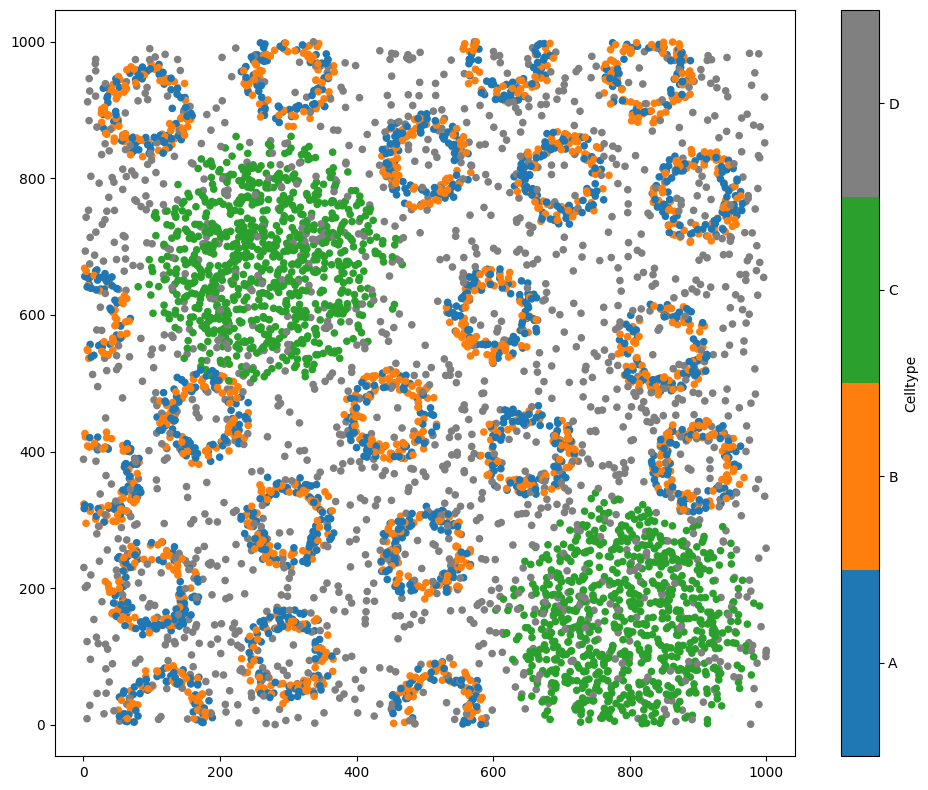

In [1]:
# Import the muspan library
import muspan as ms

# Load a standard example domain stored within the library
domain = ms.datasets.load_example_domain('Synthetic-Points-Architecture')

# Visualise the domain, coloring the points by their 'Celltype'
ms.visualise.visualise(domain, color_by='Celltype')

Say we conduct some analysis that added some extra labels to the objects that we'd like to use for downstream analysis outside of MuSpAn. For example, this could be the local indicators of co-localisation generated by the Topographical Correlation Map (TCM) about the D cells to the C cells. 

Don't worry about the details of the TCM - this is just generating us some additional labels to the D cells. If you'd like more information on the TCM, see our documentation and tutorial on the spatial statistic.

Let's compute a TCM from the D cells to the C cells and check that new labels have been added. 

          Celltype  TCM contributions
object_id                            
0                B                NaN
1                B                NaN
2                B                NaN
3                B                NaN
4                A                NaN
...            ...                ...
5986             D         -11.283552
5987             D          -1.669085
5988             D          -6.337646
5989             D         -17.576247
5990             D          23.309904

[5991 rows x 2 columns]


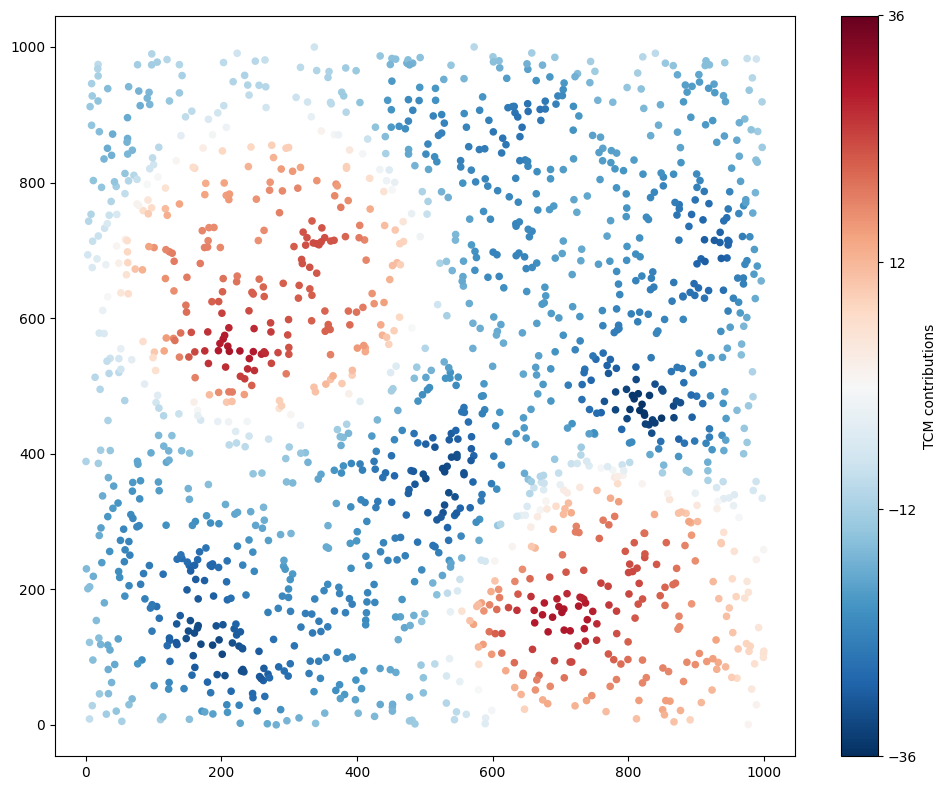

In [2]:
# Calculate the Topographical Correlation Map (TCM) for the domain
# We are comparing population A (Celltype 'D') with population B (Celltype 'C')
# The contributions are added as labels to the domain with the label name 'TCM contributions'
TCM = ms.spatial_statistics.topographical_correlation_map(
    domain,
    population_A=('Celltype', 'D'),
    population_B=('Celltype', 'C'),
    add_contribution_as_labels=True,
    contribution_label_name='TCM contributions'
)

# Visualise the domain, coloring the points by their 'TCM contributions'
# We are plotting only the objects of Celltype 'D' to see the TCM contributions
ms.visualise.visualise(
    domain,
    color_by='TCM contributions',
    objects_to_plot=('Celltype', 'D')
)

# Print the labels of the domain to verify the added 'TCM contributions'
domain.print_labels()

Great, we can see our D cells have an additional continuous label called 'TCM contributions'. Now we'd like to use this information for downstream analysis or for checkpointing our analysis. 

We can save the current state of the domain to a csv file using the `domain_to_csv`.

In [3]:
# Export the domain to a CSV file
# The 'domain_to_csv' function from the 'io' submodule of MuSpAn is used for this purpose.
# We specify the domain to be exported, the name of the file, and the path where the file should be saved.
ms.io.domain_to_csv(domain, name_of_file='Example_domain', path_to_save='.')

Domain Example_domain exported as csv successfully to ..


This csv file will contain all user-relevant information stored within the domain: object_id, (x,y) coordinates, object_type, labels and collections. 

If the object is not point-like, then all vertices defining that object are provided. Collections are given as booleans of whether the object is or is not within that collection.

We can check this out by returning the pandas dataframe associated with this csv file. This also allows for muspan integration in python native workflows without the need to export and import the csv file.

Let's export the domain again but this time return the dataframe.

In [4]:
# Export the domain to a CSV file and return it as a pandas dataframe
# The 'domain_to_csv' function from the 'io' submodule of MuSpAn is used for this purpose.
# We specify the domain to be exported, the name of the file, the path where the file should be saved,
# and set 'return_dataframe' to True to get the dataframe as output.
domain_df = ms.io.domain_to_csv(domain, name_of_file='Example_domain', path_to_save='.', return_dataframe=True)

# Display the dataframe
domain_df

Domain Example_domain exported as csv successfully to ..


,object_id,x,y,object_type,Celltype,TCM contributions,Cell centres
0,0,138.056440,232.035534,point,B,NaN,True
1,1,103.849304,154.950459,point,B,NaN,True
2,2,141.987459,179.353158,point,B,NaN,True
3,3,65.700054,167.538765,point,B,NaN,True
4,4,168.590295,186.825420,point,A,NaN,True
...,...,...,...,...,...,...,...
5986,5986,32.675410,449.043212,point,D,-11.283552,True
5987,5987,433.636717,819.080020,point,D,-1.669085,True
5988,5988,589.109888,241.465748,point,D,-6.337646,True
5989,5989,152.706328,332.753026,point,D,-17.576247,True


In this tutorial, we have shown how a MuSpAn domain can be export as a csv file and a pandas dataframe. This functionality allows for greater flexibility in analysing and processing MuSpAn domain output data using standard data science tools. For more information on the `domain_to_csv` check out our documentation on the function.